# Let us first import all the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and Splitting data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize

# ML algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load the dataset

In [ ]:
smartphone_dataset = pd.read_csv("E:/Smartphones_cleaned_dataset.csv")

In [ ]:
print(smartphone_dataset.head())

  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120                 3                1.0  android  

# Handling Missing Values

In [ ]:
print(smartphone_dataset.shape)

(980, 26)


In [ ]:
print(smartphone_dataset.isnull().sum())

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64


# Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

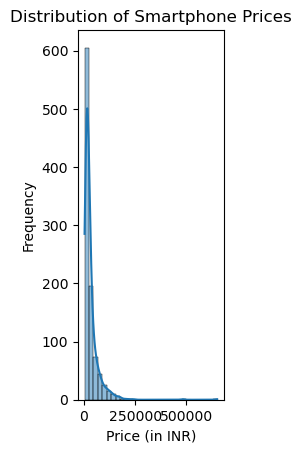

In [ ]:
plt.subplot(1, 3, 1) # (1 row, 3 columns, 1st plot)
sns.histplot(smartphone_dataset['price'], bins=30, kde=True)
plt.title('Distribution of Smartphone Prices')
plt.xlabel('Price (in INR)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Rating')

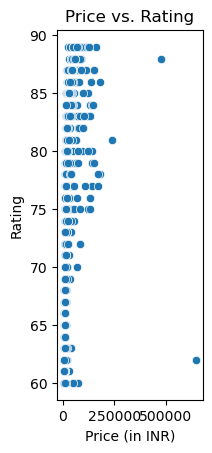

In [ ]:
plt.subplot(1, 3, 2) # (1 row, 3 columns, 2nd plot)
sns.scatterplot(x='price', y='rating', data=smartphone_dataset)
plt.title('Price vs. Rating')
plt.xlabel('Price (in INR)')
plt.ylabel('Rating')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'xiaomi'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'vivo'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'oppo'),
  Text(5, 0, 'motorola'),
  Text(6, 0, 'apple'),
  Text(7, 0, 'oneplus'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'tecno')])

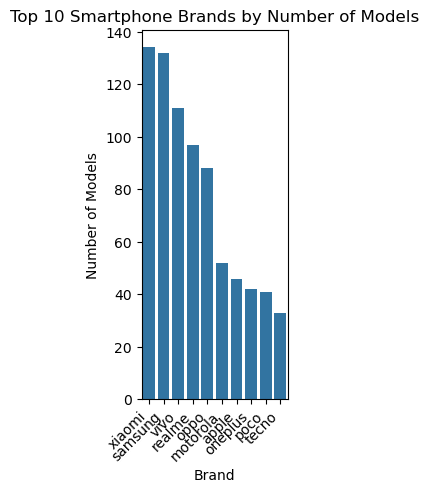

In [ ]:
plt.subplot(1, 3, 3) # (1 row, 3 columns, 3rd plot)
brand_counts = smartphone_dataset['brand_name'].value_counts().head(10)
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Top 10 Smartphone Brands by Number of Models')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=45, ha='right')

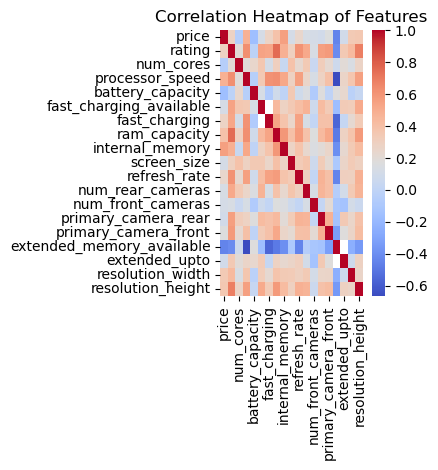

In [ ]:
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd plot)

numeric_smartphone_dataset = smartphone_dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_smartphone_dataset.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

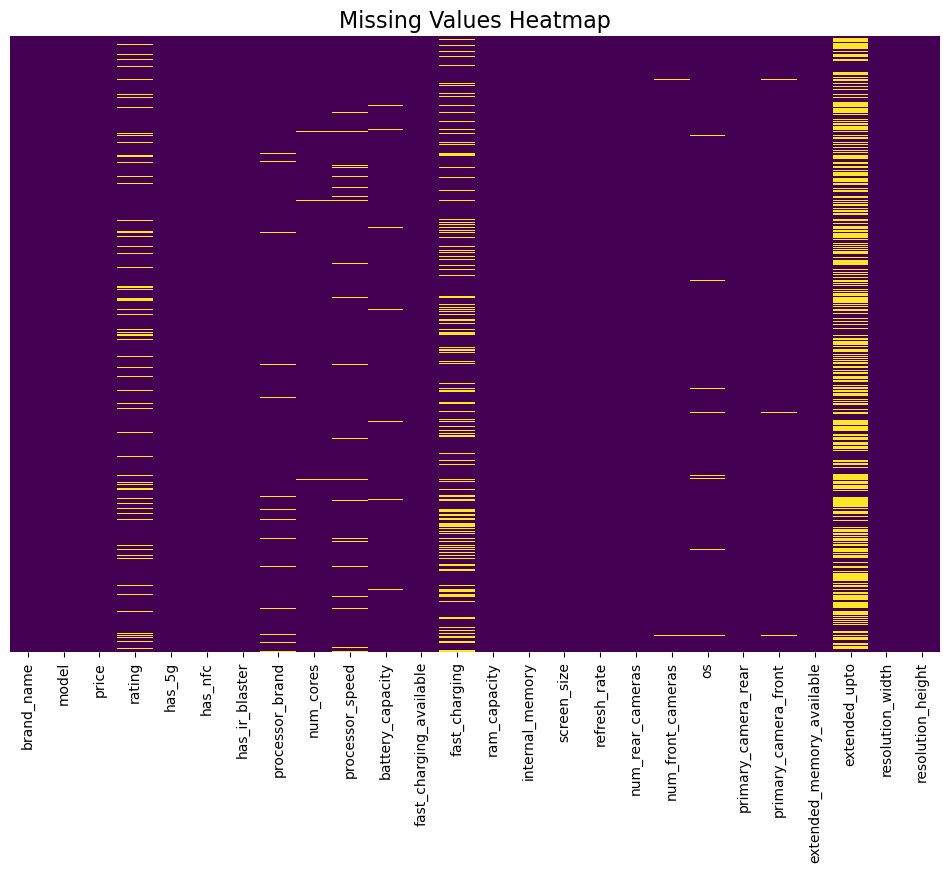

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(smartphone_dataset.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap", fontsize = 16)
plt.show()

In [ ]:
smartphone_dataset['extended_upto'] = smartphone_dataset['extended_upto'].fillna(0) #extended_upto feature values are replaced to 0
smartphone_dataset['fast_charging'] = smartphone_dataset['fast_charging'].fillna(0) #fast_charging feature values are replaced to 0

feature_to_median = [
    'rating', 'processor_speed', 'battery_capacity', 'num_cores',
    'primary_camera_front', 'num_front_cameras' ] #Replacing few column missing values to the median value
for col in feature_to_median:
    median_val = smartphone_dataset[col].median()
    smartphone_dataset[col].fillna(median_val, inplace=True)
    print(f"Imputed '{col}' with median value: {median_val}")

features_to_mode = ['processor_brand', 'os'] #Replacing few column missing values to the mode value

for col in features_to_mode:
    mode_val = smartphone_dataset[col].mode()[0]
    smartphone_dataset[col].fillna(mode_val, inplace=True)
    print(f"Imputed '{col}' with mode value: '{mode_val}'")


print("\nFinal count of missing values:")
print(smartphone_dataset.isnull().sum())

print("\nData cleaning complete! ✨")

Imputed 'rating' with median value: 80.0
Imputed 'processor_speed' with median value: 2.3
Imputed 'battery_capacity' with median value: 5000.0
Imputed 'num_cores' with median value: 8.0
Imputed 'primary_camera_front' with median value: 16.0
Imputed 'num_front_cameras' with median value: 1.0
Imputed 'processor_brand' with mode value: 'snapdragon'
Imputed 'os' with mode value: 'android'

Final count of missing values:
brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras     

C:\Users\DELL\AppData\Local\Temp\ipykernel_39644\1963530755.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smartphone_dataset[col].fillna(median_val, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_39644\1963530755.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



# Price Tiers and Feature Engineering

In [ ]:
def create_price_tier(price):
    if price < 20000:
        return 'Budget'
    elif 20000 <= price < 50000:
        return 'Mid-Range'
    else:
        return 'Flagship'
smartphone_dataset['price_tier'] = smartphone_dataset['price'].apply(create_price_tier)

Y = smartphone_dataset['price_tier']
X = smartphone_dataset.drop(['price', 'price_tier', 'model'], axis=1)
categorical_features = ['brand_name', 'processor_brand', 'os']
numerical_features = [col for col in X.columns if col not in categorical_features]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Models and Pipelines



--- The Best Model with Cross-Validation ---


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y,


Cross-Validation Results Summary:
                 Model  Avg. Accuracy  Std Deviation
2        Random Forest       0.866327       0.023358
4                  SVM       0.858163       0.023134
1  K-Nearest Neighbors       0.846939       0.032589
0        Decision Tree       0.836735       0.014065
3          Naive Bayes            NaN            NaN

🏆 Best performing model is: Random Forest with an average accuracy of 0.8663

---Detailed Analysis of Random Forest ---


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


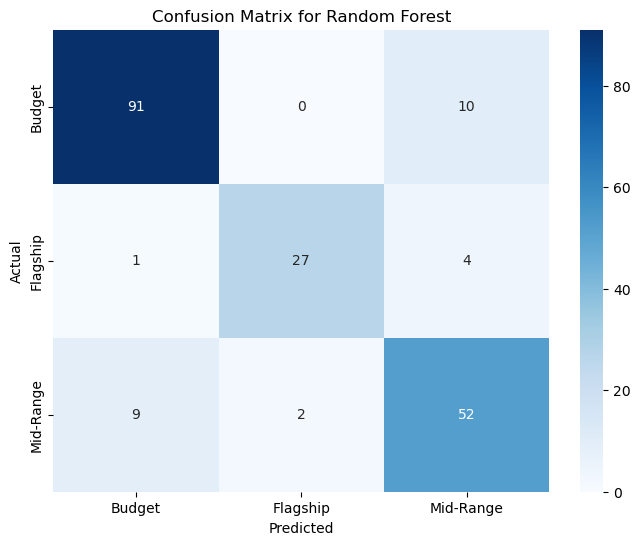

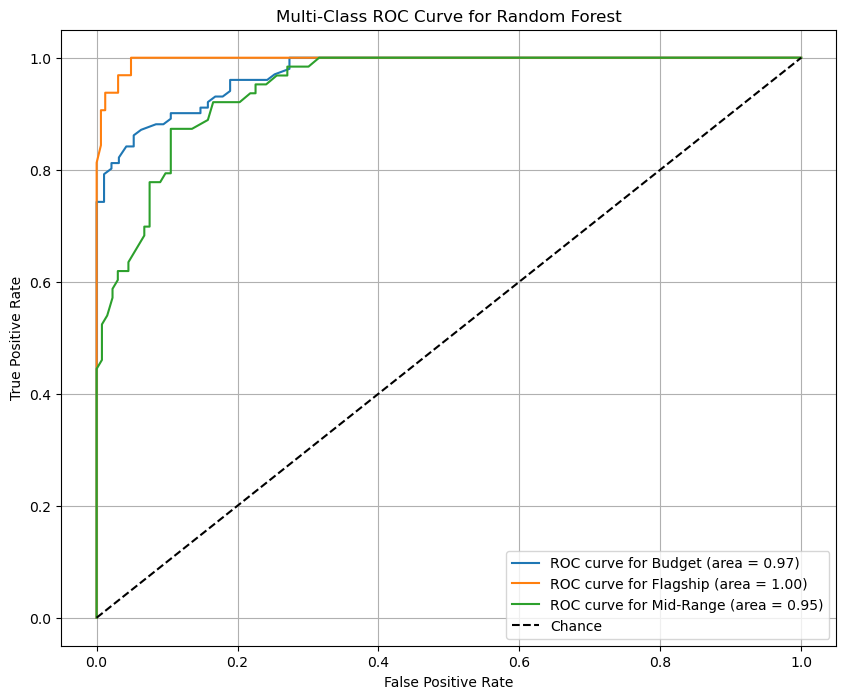

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42)
}
print("\n--- The Best Model with Cross-Validation ---")
results = []
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    scores = cross_val_score(pipeline, X, Y, cv=5, scoring='accuracy', n_jobs=-1)
    results.append({
        'Model': name,
        'Avg. Accuracy': scores.mean(),
        'Std Deviation': scores.std()
    })

results_smartphone_dataframe = pd.DataFrame(results).sort_values(by='Avg. Accuracy', ascending=False)
print("\nCross-Validation Results Summary:")
print(results_smartphone_dataset)

best_model_name = results_smartphone_dataset.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\n🏆 Best performing model is: {best_model_name} with an average accuracy of {results_smartphone_dataset.iloc[0]['Avg. Accuracy']:.4f}")

print(f"\n---Detailed Analysis of {best_model_name} ---")

final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', best_model)])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)
y_pred_proba = final_pipeline.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred, labels=final_pipeline.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_pipeline.classes_, yticklabels=final_pipeline.classes_)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_test_binarized = label_binarize(y_test, classes=final_pipeline.classes_)

plt.figure(figsize=(10, 8))
for i, class_name in enumerate(final_pipeline.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = np.trapz(tpr, fpr)
    plt.plot(fpr, tpr, label=f'ROC curve for {class_name} (area = {roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title(f'Multi-Class ROC Curve for {best_model_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
